In [1]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamefinder

import datetime
import time
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

### Analysis

In [2]:
#Get entirely of List
allteams = teams.get_teams()
print('Number of Teams: {}'.format(len(allteams)))

team_names = []
for i in range(0, len(allteams)):
    team_names.append(allteams[i]['full_name'])
team_names[9] = 'LA Clippers'

Number of Teams: 30


In [3]:
master_df = pd.read_excel('datasets_EXPORT/OffRt_MASTERDF.xlsx')
df = master_df[master_df['TEAM_NAME'] == 'Boston Celtics'] #<-- where I change team name
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,PPP,OffRt
67,22021,1610612738,BOS,Boston Celtics,22100875,2022-02-16,BOS vs. DET,L,240,111,...,30,29,8,6,15,14,-1.0,97.92,1.133578,113.357843
68,22021,1610612738,BOS,Boston Celtics,22100869,2022-02-15,BOS @ PHI,W,242,135,...,51,28,2,10,9,25,48.0,93.68,1.441076,144.107600
69,22021,1610612738,BOS,Boston Celtics,22100856,2022-02-13,BOS vs. ATL,W,240,105,...,54,21,5,6,12,15,10.0,96.88,1.083815,108.381503
70,22021,1610612738,BOS,Boston Celtics,22100842,2022-02-11,BOS vs. DEN,W,240,108,...,54,24,13,8,12,20,6.0,103.20,1.046512,104.651163
71,22021,1610612738,BOS,Boston Celtics,22100817,2022-02-08,BOS @ BKN,W,241,126,...,52,32,6,8,13,14,35.0,100.04,1.259496,125.949620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,22021,1610612738,BOS,Boston Celtics,1522100075,2021-08-17,BOS vs. SAC,L,199,67,...,39,19,2,8,28,17,-26.0,89.48,0.748771,74.877068
132,22021,1610612738,BOS,Boston Celtics,1522100047,2021-08-14,BOS vs. PHI,W,201,100,...,47,22,8,12,13,24,22.4,92.48,1.081315,108.131488
133,22021,1610612738,BOS,Boston Celtics,1522100034,2021-08-12,BOS vs. ORL,W,200,108,...,42,33,8,5,13,20,37.0,84.96,1.271186,127.118644
134,22021,1610612738,BOS,Boston Celtics,1522100018,2021-08-10,BOS @ DEN,W,200,107,...,45,25,7,1,12,25,20.0,90.80,1.178414,117.841410


In [4]:
pass_df = pd.read_excel('datasets_EXPORT/Pass_Stats/Master_Passto_Stats.xlsx')
pass_df = pass_df[pass_df['TEAM_NAME'] == 'Boston Celtics'] #<-- where I change team name
passmade_df = pass_df.groupby('GAME_DATE', as_index=False).agg({"PASS": "sum"})

passmade_df['GameCount'] = ''
passmade_df['GAME_DATE'] = passmade_df['GAME_DATE'].dt.strftime('%Y-%m-%d')

for i in range(0,len(passmade_df)):
    passmade_df['GameCount'][i] = i+1
passmade_df

<ipython-input-4-ed98957acebe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passmade_df['GameCount'][i] = i+1


,GAME_DATE,PASS,GameCount
0,2021-10-20,327,1
1,2021-10-22,288,2
2,2021-10-24,296,3
3,2021-10-25,311,4
4,2021-10-27,247,5
5,2021-10-30,301,6
6,2021-11-01,290,7
7,2021-11-03,277,8
8,2021-11-04,285,9
9,2021-11-06,286,10


In [5]:
merged_df = pd.merge(left=df, right=passmade_df, how='left', left_on='GAME_DATE', right_on='GAME_DATE')
merged_df = merged_df[merged_df['GameCount'].notna()]
merged_df['PassPerPoss'] = merged_df['PASS'] / merged_df['POSS']
merged_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,BLK,TOV,PF,PLUS_MINUS,POSS,PPP,OffRt,PASS,GameCount,PassPerPoss
0,22021,1610612738,BOS,Boston Celtics,22100875,2022-02-16,BOS vs. DET,L,240,111,...,6,15,14,-1.0,97.92,1.133578,113.357843,278.0,59,2.839052
1,22021,1610612738,BOS,Boston Celtics,22100869,2022-02-15,BOS @ PHI,W,242,135,...,10,9,25,48.0,93.68,1.441076,144.107600,285.0,58,3.042272
2,22021,1610612738,BOS,Boston Celtics,22100856,2022-02-13,BOS vs. ATL,W,240,105,...,6,12,15,10.0,96.88,1.083815,108.381503,271.0,57,2.797275
3,22021,1610612738,BOS,Boston Celtics,22100842,2022-02-11,BOS vs. DEN,W,240,108,...,8,12,20,6.0,103.20,1.046512,104.651163,304.0,56,2.945736
4,22021,1610612738,BOS,Boston Celtics,22100817,2022-02-08,BOS @ BKN,W,241,126,...,8,13,14,35.0,100.04,1.259496,125.949620,330.0,55,3.298681
5,22021,1610612738,BOS,Boston Celtics,22100806,2022-02-06,BOS @ ORL,W,241,116,...,6,14,17,33.0,103.16,1.124467,112.446685,334.0,54,3.237689
6,22021,1610612738,BOS,Boston Celtics,22100788,2022-02-04,BOS @ DET,W,241,102,...,9,13,17,9.0,95.00,1.073684,107.368421,306.0,53,3.221053
7,22021,1610612738,BOS,Boston Celtics,22100775,2022-02-02,BOS vs. CHA,W,241,113,...,5,18,21,6.0,101.48,1.113520,111.351991,330.0,52,3.251872
8,22021,1610612738,BOS,Boston Celtics,22100762,2022-01-31,BOS vs. MIA,W,241,122,...,6,10,15,30.0,96.88,1.259290,125.928984,325.0,51,3.354666
9,22021,1610612738,BOS,Boston Celtics,22100745,2022-01-29,BOS @ NOP,W,239,107,...,7,14,19,10.0,93.84,1.140239,114.023870,304.0,50,3.239557


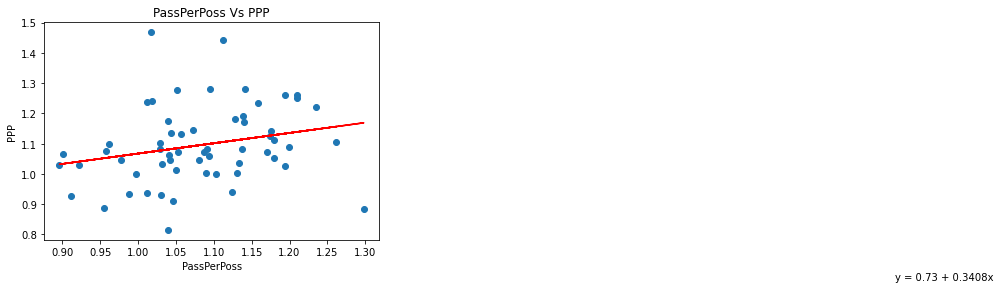

In [6]:
x = np.log(merged_df['PassPerPoss']) #np.int64(merged_df['GameCount'])
y = merged_df['PPP']
plt.scatter(x, y)
plt.title('PassPerPoss Vs PPP')
plt.xlabel('PassPerPoss')
plt.ylabel('PPP')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = 'red')
plt.text(2, 0.65, 'y = ' + '{:.2f}'.format(b) + ' + {:.4f}'.format(m) + 'x', size=10)
plt.show()

C:\Users\bhuan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


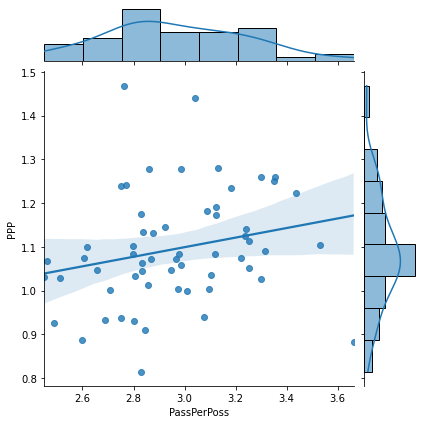

In [9]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(y, x, kind="reg")

### R2 Score

In [12]:
#Get entirely of List
allteams = teams.get_teams()
print('Number of Teams: {}'.format(len(allteams)))

team_names = []
for i in range(0, len(allteams)):
    team_names.append(allteams[i]['full_name'])
team_names[9] = 'LA Clippers'

Number of Teams: 30


In [13]:
r2_scores = pd.DataFrame(columns=['TEAM_NAME','r2_score','y-int'])
r2_scores

,TEAM_NAME,r2_score,y-int


In [14]:
r2_scores['TEAM_NAME'] = team_names

In [15]:
for i in range(0, len(team_names)):
    master_df = pd.read_excel('datasets_EXPORT/OffRt_MASTERDF.xlsx')
    pass_df = pd.read_excel('datasets_EXPORT/Pass_Stats/Master_Passto_Stats.xlsx')

    df = master_df[master_df['TEAM_NAME'] == team_names[i]] #<-- where I change team name
    pass_df = pass_df[pass_df['TEAM_NAME'] == team_names[i]] #<-- where I change team name
    passmade_df = pass_df.groupby('GAME_DATE', as_index=False).agg({"PASS": "sum"})
    passmade_df['GAME_DATE'] = passmade_df['GAME_DATE'].dt.strftime('%Y-%m-%d')
    
    passmade_df['GameCount'] = ''
    for j in range(0,len(passmade_df)):
        passmade_df['GameCount'][j] = j+1
    
    merged_df = pd.merge(left=df, right=passmade_df, how='left', left_on='GAME_DATE', right_on='GAME_DATE')
    merged_df = merged_df[merged_df['GameCount'].notna()]
    merged_df['PassPerPoss'] = merged_df['PASS'] / merged_df['POSS']

    m, b = np.polyfit(np.log(merged_df['PassPerPoss']), merged_df['PPP'], 1)
    r2_scores['r2_score'][i] = m
    r2_scores['y-int'][i] = b

<ipython-input-15-cfea4f6ec9a5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passmade_df['GameCount'][j] = j+1


In [16]:
r2_scores

,TEAM_NAME,r2_score,y-int
0,Atlanta Hawks,-0.051016,1.181104
1,Boston Celtics,0.340784,0.726387
2,Cleveland Cavaliers,0.175175,0.895682
3,New Orleans Pelicans,0.291831,0.752116
4,Chicago Bulls,0.25604,0.869874
5,Dallas Mavericks,0.34155,0.726061
6,Denver Nuggets,0.473182,0.561735
7,Golden State Warriors,0.115126,0.976437
8,Houston Rockets,0.156778,0.896173
9,LA Clippers,0.264591,0.800483
